# Python statistics
<hr>

In this chapter, we explain how to perform statistical analysis on data using Python. Rather than delving into the theoretical and computational details of the statistical concepts and methods, we aim to provide intuitive, visual explanations that are easy to understand.

## Mean, Variance
<hr>

The `mean` value is the `average` value of a number of numeric data. To calculate the mean, find the sum of all numeric values, and divide the sum by the number of values.

`Variance` is the squared deviation of a variable from its mean. 
- A large variance indicates that the data is spread out, while a small variance indicates that the data is clustered closely around the mean.

We use the dataset "tips" as an example from the `Seaborn` library.

In [1]:
import seaborn as sns

tips = sns.load_dataset('tips')
tips                       

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


The following codes draw a graph of the data in the column "tip".

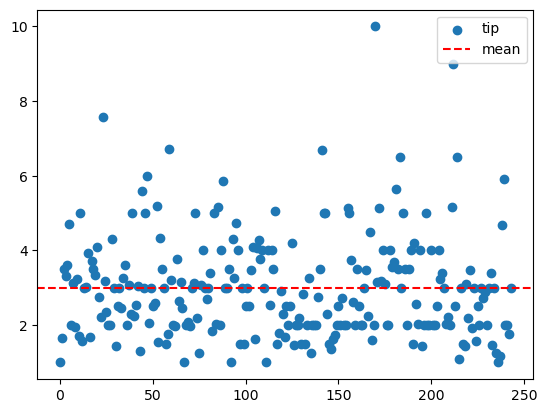

In [2]:
import matplotlib.pyplot as plt
import numpy as np

num = tips.shape[0]
plt.scatter(x=np.arange(num), y=tips["tip"], label="tip")
plt.axhline(y=np.mean(tips['tip']), color='r', linestyle='--', label='mean') # axhline can draw a horizonal line parallel to the axis
plt.legend()
plt.show()

To compute the mean, we can use the method `mean()` from `Numpy` or `Pandas`.

- The method `numpy` in `Numpy`can computer the average value of 

In [3]:
np.mean(tips["tip"])

2.99827868852459

Since "tips" is a `DataFrame` type, we can directly use the methods of Pandas to it.

In [4]:
tips["tip"].mean()

2.99827868852459

To compute the variance, we can use the method `var()` from `Numpy` or `Pandas`.

In [5]:
np.var(tips["tip"])

1.9066085124966428

In [6]:
tips["tip"].var()

1.9144546380624725

- The square root of the variance is called `standard deviation`. 

## Distribution
<hr>

In data analysis, the columns of a dataset represent random variables—quantities that fluctuate due to randomness. A `probability distribution` characterizes the likelihood of different values these variables may assume.

### Uniform distribution
<hr>

The uniform distribution is a probability distribution where each value within a certain range is **equally likely to occur** and values outside of the range never occur. 

For the visualization of the distribution of data, we can draw the histogram graph. 

<Axes: ylabel='Count'>

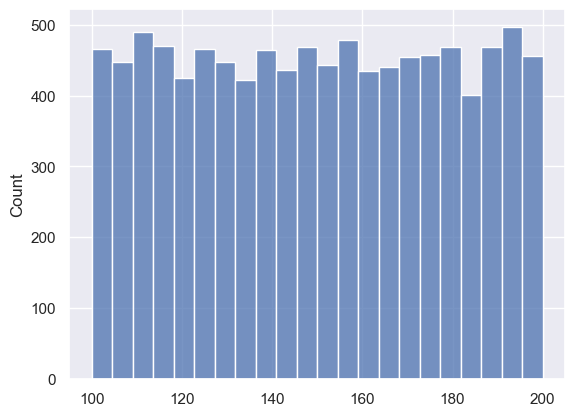

In [7]:
import numpy as np
import seaborn as sns

sns.set_theme()
data = np.random.uniform(100, 200, 10000) # generate 10000 random datas uniformally distributed between 50 and 100
sns.histplot(data=data) # use the histplot of seaborn to draw the histogram graph

For uniformly distributed data, the histogram typically displays bars of approximately equal height, resulting in a **flat** or level appearance.

### Normal distribution
<hr>

`Normal distribution`, also known as the Gaussian distribution, is a probability distribution that appears as a **"bell curve"** when graphed. The normal distribution describes a symmetrical plot of data around its mean value, where the width of the curve is related to the standard deviation. **The data near the mean are more frequent in occurrence than data far from the mean**.

The normal distribution is perhaps **the most important distribution**. Many real world phenomena, like IQ test scores and human heights/weights, roughly follow a normal distribution. Many common statistical tests also assume distributions are normal.

The central limit theorem says that the **sampling distribution of the mean will always be normally distributed**, as long as the **sample size is large enough**.

<Axes: ylabel='Count'>

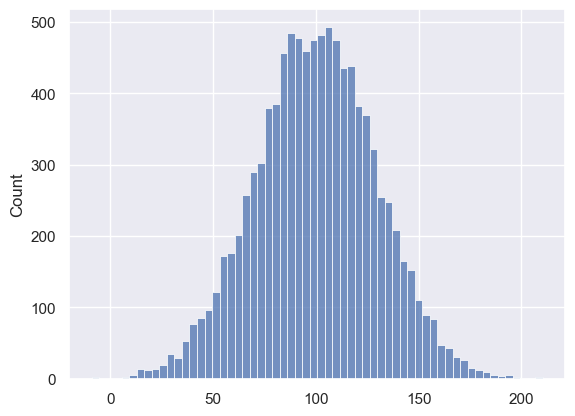

In [8]:
import numpy as np
import seaborn as sns

data = np.random.normal(100, 30, 10000) # generate 10000 random data normall distributed between 50 and 100
sns.histplot(data=data) # use the histplot of seaborn to draw the histogram graph

For uniformly distributed data, the histogram typically displays a **bell** shape.

## Correlation

<hr>

There are three types of correlation coefficients that can be computed by the `pandas.DataFrame.corr()` method: `Pearson Correlation (default)`, `Spearman Rank Correlation`, `Kendall Tau Correlation`.

The value of all three correlation coefficients ranges from -1 to +1.  What is a good correlation? It depends on the use, usually **at least 0.6 (or -0.6)** to call it a good correlation.

### Pearson correlation
<hr>

`Pearson Correlation` measures how strongly and in which direction two numerical variables are related in a **linear** fashion. 

Its value ranges from -1 to +1. When its value is positive, it signifies a direct (positive) relationship; when its value is negative, it signifies an inverse (negative) relationship. 

- Values of correlation closer to +1 or -1 suggest that the data points align more closely along a straight line, indicating a stronger linear relationship.
- Conversely, when correlation is near 0, the linear relationship is weak.

We usually first draw a graph to visulize the relationship of two variables before computing the correaltion values.

<Axes: xlabel='total_bill', ylabel='tip'>

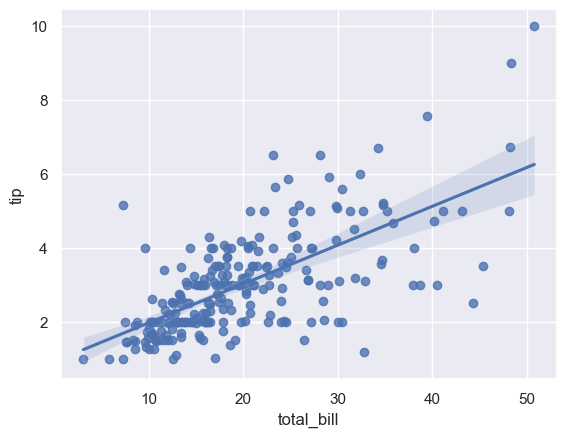

In [9]:
sns.regplot(data=tips, x="total_bill", y="tip")

In [10]:
tips['total_bill'].corr(tips['tip']) # compute the Pearson correlation

0.6757341092113645

- `Pearson Correlation` is **most common** of all the correlation measures.
- `Pearson Correlation is suitable when variables are **normally distributed and linearly related**.

### Spearman correlation
<hr>

The `Spearman correlation` coefficient is a measure of the **monotonicity** of the relationship between two **ranked/ordered datasets**. Its value varies between -1 and +1 with 0 implying no correlation. Correlations close to -1 or +1 imply a strong monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

<Axes: xlabel='size', ylabel='tip'>

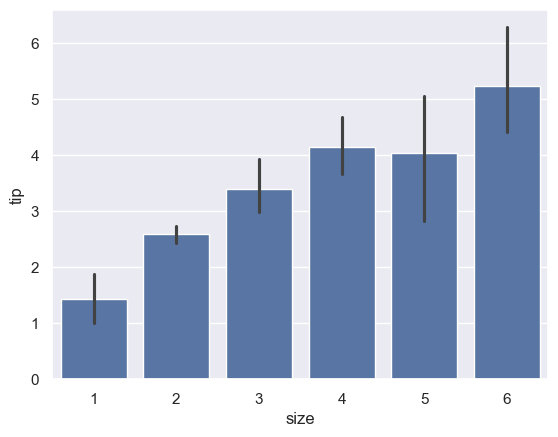

In [11]:
import matplotlib.pyplot as plt

sns.barplot(
    data=tips,
    x="size",
    y="tip", 
)

In [12]:
tips['size'].corr(tips['tip'], method="spearman") # compute the spearman correlation

0.46826792926211475

<Axes: xlabel='day', ylabel='tip'>

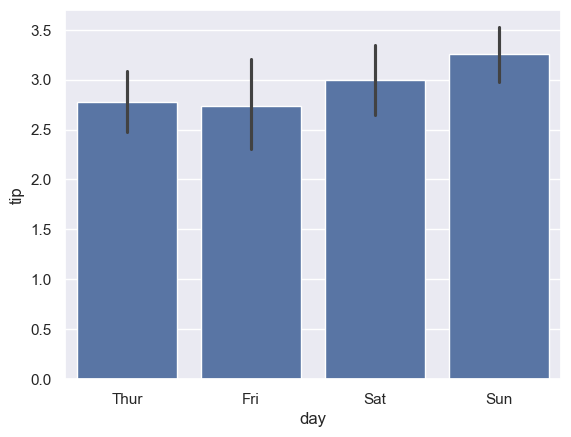

In [13]:
import matplotlib.pyplot as plt

sns.barplot(
    data=tips,
    x="day",
    y="tip", 
)

- Use Pandas' `factorize( )` method to obtain a numeric representation of catogorical data.

In [14]:
import pandas as pd

tips["day_numeric"] = pd.factorize(tips["day"])[0] # [1] is the orginal catogorical data
tips

,total_bill,tip,sex,smoker,day,time,size,day_numeric
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [15]:
tips['day_numeric'].corr(tips['tip'], method="spearman") # compute the spearman correlation

-0.17434544550231088

`Kendall Tau correlation` is similar to `Spearman correlation` but more focused on **pairwise disagreements between two ranking lists** and are more suitable for the data with many tied ranks. Due to space limitation, we omit its introduction.

The following table summerizes the differences of the three correlation measures.

| Feature                 | **Pearson**                      | **Spearman**                      | **Kendall Tau**                |
| ----------------------- | -------------------------------- | --------------------------------- | ------------------------------ |
| Relationship Measured   | Linear                           | Monotonic (can be non-linear)     | Monotonic (based on ranks)     |
| Sensitivity to Outliers | High                             | Low                               | Lower                          |
| Data Type Requirement   | Continuous, Normally Distributed | Ranked or Ordinal                 | Ranked or Ordinal              |
| Distribution Assumption | Assumes normality                | No distribution assumption        | No distribution assumption     |


## Hypothesis test
<hr>

Hypothesis testing enables data scientists to determine whether their findings, theories, or assumptions are the result of random chance or supported by statistical evidence.
- A hypothesis is a proposed explanation or prediction derived from prior knowledge or observation.

Examples of a hypothesis: (1) there is no relationship between gender and the amount of tips; (2) smokers give more tips than non-smokers.

There are two parts of a hypothesis:

* **Null Hypothesis ($H_0$):**
  The null hypothesis proposes that there is no effect or difference between the variables in two or more samples. For example, a null hypothesis might state, *"There is no relationship between gender and the amount of tips."*
  It is the default assumption and the one that is formally tested—either to be retained or rejected based on statistical evidence.

* **Alternative Hypothesis ($H_1$):**
  The alternative hypothesis suggests that there is a meaningful effect or difference between the variables. For instance, it might state, *"Gender has an impact on the amount of tips."*
  This hypothesis represents what we aim to support if the null hypothesis is rejected.

Below are some hypothesis testing terms:

1. `Level of Significance (α)`: often denoted as **α**, is the threshold we set to decide whether to reject the null hypothesis $H_0$.
    - A common value is **0.05**, meaning we are willing to accept a 5% chance of a false assumption.
    - If the **p-value ≤ α**, we **reject** the null hypothesis.

2. `p-value`: The **p-value** tells us how likely it is to observe our data, or something more extreme, **if the null hypothesis were true**.

   - A **small p-value** (typically ≤ 0.05) suggests that the observed result is unlikely under the null hypothesis $H_0$, and we reject it.
   - A **large p-value** indicates that the data is consistent with the null hypothesis $H_0$, and we accept it.

3. `Confidence Level`: The  confidence level tells us how confident we are that a **confidence interval** contains the true value of a population parameter (like the mean or proportion). **Confidence level = 1 - $\alpha$**, where $\alpha$ is the level of significance.

   - A **95% confidence level** means that if we repeated the experiment many times, about 95% of the resulting confidence intervals would contain the true value.

4. `Confidence Interval (CI)`: A confidence interval is a **range of values** estimated from sample data that is likely to contain the true value of a population parameter.

   - For example: “We are 95% confident that the true average height is between 170 cm and 175 cm.”

### t-test
<hr>

`Student's t-test` is a statistical test used to test whether the difference between the **numerical values** of two groups is statistically significant or not. 

In this test, the test statistic follows a `Student's t-distribution` under the null hypothesis. This distribution is similar to normal distribution but with **slightly larger variance**, and is more suitable for testing the real life sampled data. In addition to mean and varariance, it has another parameter called `degree of freedom`, which is the number of values in the final calculation of a statistic that are free to vary.

There are 3 types t-tests in general and we can use the corresponding methods in the `scipy.stats` from the `scipy` library:

- One sample t-test → `ttest_1samp`
- Two independent sample t-test → `ttest_ind`
- Two dependent sample t-test → `ttest_rel`

Two events are `independent` if the occurrence of one event does not affect the chances of the occurrence of the other event. In hypothestis tests, `independent` means one sampeld data is not affected by other sampled data.

### One sample t-test 
<hr>

A **one-sample t-test** is to test whether the mean of a population equals to/not less than/not greater than a value specified in a null hypothesis. The syntax for the method `ttest_1samp` is below:

<table>
    <tr style="border-top:solid; border-bottom:solid">
        <th colspan=2 style="text-align:center">ttest_1samp(a, popmean, alternative='two-sided')</th>
    </tr>
    <tr>
        <td style="text-align:left">a</td>
        <td style="text-align:left">Array like, sampled observations</td>
    </tr>
    <tr>
        <td style="text-align:left">popmean</td>
        <td style="text-align:left">Usually float, expected value in null hypothesis</td>
    </tr>
    <tr>
        <td style="text-align:left", rowspan=3>alternative</td>
        <td style="text-align:left">"two-sided", H1: the mean of the sampled data is different than the given population mean </td>
    </tr>
    <tr>
        <td style="text-align:left">"less", H1: the mean of the sampled data is less than the given population mean </td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">"greater", H1: the mean of the sampled data is greater than the given population mean</td>
    </tr>
</table>
<br />

For example, we test the null hypothesis $H_0$: the mean of tips is equal to 3.

- Install the library `Scipy` by `pip install`

```python
pip install scipy
```

In [16]:
from scipy import stats
import seaborn as sns

tips = sns.load_dataset('tips')
stats.ttest_1samp(tips['tip'], popmean=3)

TtestResult(statistic=-0.019432641422916876, pvalue=0.9845119176410544, df=243)

- `ttest_1samp` return the t-statistics, p-value and the number of degrees of freedom.

Suppose we choose a confidence level 95% (or equivalently, significance level $\alpha=0.05$). Since the p-value is 0.98 > 0.05, we do not reject the null hypothesis $H_0$. Namely, we can believe that the mean of tips is equal to 3 (the probability is 98.45%).

For example, we test a one-sided null hypothesis $H_0$: the mean of tips is not less than 3.

In [17]:
tips = sns.load_dataset('tips')
stats.ttest_1samp(tips['tip'], popmean=3, alternative='less')

TtestResult(statistic=-0.019432641422916876, pvalue=0.4922559588205272, df=243)

Suppose we choose a confidence level 95% (or equivalently, significance level $\alpha=0.05$). Since the p-value is 0.49 > 0.05, we do not reject the null hypothesis $H_0$. Namely, we can believe that the mean of tips is not less than 3 (the probability is 50.77%).

### Two sample t-test 
<hr>

A `two-sample t-test` tests the null hypothesis such that the means of two populations are equal or the mean of one population is not less than/not greater than another.

For `independent two samples`, this can be done by the method `ttest_ind()`, the syntex of which is below:

<table>
    <tr style="border-top:solid; border-bottom:solid">
        <th colspan=2 style="text-align:center">ttest_ind(a, b, equal_var=True, alternative='two-sided')</th>
    </tr>
    <tr>
        <td style="text-align:left">a</td>
        <td style="text-align:left">Array like, sampled observations</td>
    </tr>
    <tr>
        <td style="text-align:left">b</td>
        <td style="text-align:left">Array like, the other sampled observations</td>
    </tr>
    <tr>
        <td style="text-align:left", rowspan=2>equal_var</td>
        <td style="text-align:left">If True (default), perform a standard independent 2 sample test that assumes equal population variances 
    </tr>
    <tr>
        <td style="text-align:left">If False, perform Welch’s t-test, which does not assume equal population variance</td>
    </tr>
    <tr>
        <td style="text-align:left", rowspan=3>alternative</td>
        <td style="text-align:left">"two-sided", H1: the mean of the sampled data is different than the other sampled data </td>
    </tr>
    <tr>
        <td style="text-align:left">"less", H1: the mean of the sampled data is less than the other sampled data </td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">"greater", H1: the mean of the sampled data is greater than the other sampled data</td>
    </tr>
</table>
<br />

For example, we want to test the null hypothesis $H_0$: the amount of tips from male customers shows no difference with that of female cusotomers.

In [18]:
import seaborn as sns
from scipy import stats

tips = sns.load_dataset("tips")
male_tip = tips[tips["sex"] == "Male"]["tip"]
female_tip = tips[tips["sex"] == "Female"]["tip"]

stats.ttest_ind(male_tip, female_tip)

TtestResult(statistic=1.387859705421269, pvalue=0.16645623503456752, df=242.0)

P-value is 0.16. If we choose a confidence level 95%, we should accept the null hypothsis $H_0$ since 0.16>0.05.

For `dependent two samples`, this can be done by the method `ttest_rel()`, the syntex of which is similar to `ttest_ind`.

- Examples of dependent two samples such as students' scores in two different exams but from the same group of students, or repeated sampling scores from the students in the same class.

### Anova
<hr>

`Analysis of Variance (ANOVA)` is a statistical formula used to compare variances to determine if there is any **difference between the means two or more groups**.

Anova can be easiy done by the method `anova` in the library `pingouin`.

- Install the library `pingonin` by `pip install`

%pip install pingouin

```{note}
`%pip` is more suitable for install libraries in the Jupyter notebook environment
```

The syntax for `anova` is below.

<table>
    <tr style="border-top:solid; border-bottom:solid">
        <th colspan=2 style="text-align:center">anova(data, between=None)</th>
    </tr>
    <tr>
        <td style="text-align:left">data</td>
        <td style="text-align:left">DataFrame</td>
    </tr>
    <tr style="text-align:left" >
        <td style="text-align:left" rowspan=2>between</td>
        <td style="text-align:left">String or list with N elements, name of column(s) in data containing the between-subject factor(s)</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left"> If between is a single string, a one-way ANOVA is computed. If between is a list with two or more elements, a N-way ANOVA is performed</td>
    </tr>
</table>
</br>

For example, the null hypothesis $H_0$: the amount of tips from male customers shows no difference with that of female cusotomers, can also tested by `ANOVA`.

In [19]:
import pingouin as pg
import seaborn as sns

tips = sns.load_dataset("tips")
pg.anova(tips, dv="tip", between="sex")

,Source,ddof1,ddof2,F,p_unc,np2
0,sex,1,242,1.926155,0.166456,0.007896


There is much information in the output, but the most imoportant one if the `p-value` shown by the "p-unc". Since the p-value 0.167 is larger than 0.05, we should accept the null hypothesis at a 95% confidence level. The test result is in consitent with that of the two sample t-test.

For example, test the null hypothesis $H_0$: there is no difference between the amount of tips and the day of the week.

In [20]:
pg.anova(tips, dv="tip", between="day")

,Source,ddof1,ddof2,F,p_unc,np2
0,day,3,240,1.672355,0.173589,0.020476


Since the p-value 0.174 is larger than 0.05, we should accept the null hypothesis at a 95% confidence level.

For example, test three null hypotheses:

- $H_0$: there is no difference between the amount of tips and whether the customer is a smoker or not.
- $H_0$: there is no difference between the amount of tips and the sex of the customers.
- $H_0$: there is no difference between the amount of tips and the interation of sex and smoker.

In [21]:
pg.anova(tips, dv="tip", between=["sex", "smoker"])

,Source,SS,DF,MS,F,p_unc,np2
0,sex,3.672183,1.0,3.672183,1.912247,0.167999,0.007905
1,smoker,0.015000,1.0,0.015000,0.007811,0.929648,0.000033
2,sex * smoker,0.639891,1.0,0.639891,0.333216,0.564313,0.001386
3,Residual,460.884051,240.0,1.920350,NaN,NaN,NaN


Since the p-values are all larger than 0.05, we should accept all the null hypothese at a 95% confidence level.

### $\chi^2$ tests
<hr>

Pearson's Chi-Square Test is to evaluate the relationship between **categorical variables**, which determines whether significant differences of the **frquencies** within data. Since the statistic used is $\chi^2$ distribution, we call this test $\chi^2$ test.

It can be easiy done by the method `chi2_independence` in the library `pingouin`.

<table>
    <tr style="border-top:solid; border-bottom:solid">
        <th colspan=2 style="text-align:center">chi2_independence(data, x, y)</th>
    </tr>
    <tr>
        <td style="text-align:left">data</td>
        <td style="text-align:left">DataFrame</td>
    </tr>
    <tr style="text-align:left; border-bottom:solid" >
        <td style="text-align:left" rowspan=2>x, y</td>
        <td style="text-align:left">String, the variables names for the Chi-squared test. Must be names of columns in data</td>
    </tr>
</table>
<br />

For example, we want to know whether the survival rate is related with gender from the titanic data. 

- $H_0$: there is no difference between the gender in the survivals. 

In [22]:
import pingouin as pg
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [23]:
pg.chi2_independence(titanic, x="survived", y="sex")

(sex           female        male
 survived                        
 0         193.474747  355.525253
 1         120.525253  221.474747,
 sex       female   male
 survived               
 0           81.5  467.5
 1          232.5  109.5,
                  test    lambda        chi2  dof          pval    cramer  \
 0             pearson  1.000000  260.717020  1.0  1.197357e-58  0.540936   
 1        cressie-read  0.666667  260.413906  1.0  1.394102e-58  0.540621   
 2      log-likelihood  0.000000  266.344480  1.0  7.106137e-60  0.546743   
 3       freeman-tukey -0.500000  276.922737  1.0  3.517208e-62  0.557494   
 4  mod-log-likelihood -1.000000  293.475958  1.0  8.693443e-66  0.573915   
 5              neyman -2.000000  349.098487  1.0  6.659745e-78  0.625943   
 
    power  
 0    1.0  
 1    1.0  
 2    1.0  
 3    1.0  
 4    1.0  
 5    1.0  )

There is a lot of information in the output. But we can only care about the `p-value` in the first row of the column "pval". Since it is much smaller than 0.05, we can reject the null hypothesis at confidence level 95%. 

- The frist two part of the information are **expected frequencies**, **observed frequencies**, respectively. The thrid part of the information is all the test results with different values of lambda.

```{note}
Anova test can also be done by the library `statesmodels` and $\chi^2$ test can also be done by the library `scipy`. But they are more cumbesome than `pingouin`.
```

## Reliability and validity test
<hr>

In research methodology (especially in fields such as **surveys**, psychometrics, and educational assessment), `reliability` and `validity` are two core indicators for evaluating the quality of a measurement scale.

## Reliablity

<hr>
Reliability refers to the consistency of measurement. It means that if the questions in a questionnaire are asked repeatedly to the same person, their responses should remain consistent each time.

### Common types of reliability
<hr>

1. **Internal Consistency Reliability**

   * Typically measured using **Cronbach’s alpha** (α).
   * Indicates how closely related a set of items are as a group.
   * Thresholds:

     * α ≥ 0.9: Excellent
     * 0.8 ≤ α < 0.9: Good
     * 0.7 ≤ α < 0.8: Acceptable

`Cronbach’s alpha (α)` can be computed by the method `cronbach_alpha` in the library `pingouin`.

<table>
    <tr style="border-top:solid; border-bottom:solid">
        <th colspan=2 style="text-align:center">cronbach_alpha(data, items=None, scores=None)</th>
    </tr>
    <tr>
        <td style="text-align:left">data</td>
        <td style="text-align:left">DataFrame</td>
    </tr>
    <tr style="text-align:left" >
        <td style="text-align:left">item</td>
        <td style="text-align:left">String, column in "data" with the items names</td>
    </tr>
    <tr style="text-align:left; border-bottom:solid" >
        <td style="text-align:left">scores</td>
        <td style="text-align:left">String, column in "data" with the scores</td>
    </tr>
</table>
<br />

Suppose a survey to 10 respondents who can 3 quesions on a scale of 1 to 3.

In [24]:
import pandas as pd
import pingouin as pg

# enter survey responses as a DataFrame
# 3 questions and 10 respondents
df = pd.DataFrame({'Q1': [1, 2, 2, 3, 2, 2, 3, 3, 2, 3],
                   'Q2': [1, 1, 1, 2, 3, 3, 2, 3, 3, 3],
                   'Q3': [1, 1, 2, 1, 2, 3, 3, 3, 2, 3]})

result = pg.cronbach_alpha(data = df)
print(result)

(0.7734375, array([0.336, 0.939]))


In [25]:
df

,Q1,Q2,Q3
0,1,1,1
1,2,1,1
2,2,1,2
3,3,2,1
4,2,3,2
5,2,3,3
6,3,2,3
7,3,3,3
8,2,3,2
9,3,3,3


This method return the `Cronbach's alpha` and the corresponding 95% confidence interval.

2. **Test-Retest Reliability**

   * Measures the stability of responses over time by administering the same test twice to the same group.
   * Typically measured using `Pearson's correlation coefficient`.

3. **Split-Half Reliability**

   * Splits the items into two halves (e.g., odd vs. even items) and examines the correlation between them.
   * Typically measured using `Pearson's correlation coefficient`.

4. **Parallel Forms Reliability**

   * Compares scores from two equivalent versions of the same instrument.
   * Typically measured using `Pearson's correlation coefficient`.

## Exercises
<hr>

```{exercise}
:label: statistic
使用python 中的`statsmodels`库或`sklearn`库，编程实现《统计学》或《计量经济学》课程上的一些数据分析习题。

```

<script src="https://giscus.app/client.js"
        data-repo="robinchen121/book-Python-Data-Science"
        data-repo-id="R_kgDOKFdyOw"
        data-category="Announcements"
        data-category-id="DIC_kwDOKFdyO84CgWHi"
        data-mapping="pathname"
        data-strict="0"
        data-reactions-enabled="1"
        data-emit-metadata="0"
        data-input-position="bottom"
        data-theme="light"
        data-lang="en"
        crossorigin="anonymous"
        async>
</script>

<!-- Toogle google translation -->
<div id="google_translate_element"></div>
<script type="text/javascript">
      function googleTranslateElementInit() {
        new google.translate.TranslateElement({ pageLanguage: 'en',
                  includedLanguages: 'en,zh-CN,zh-TW,ja,ko,de,ru,fr,es,it,pt,hi,ar,fa',
layout: google.translate.TranslateElement.InlineLayout.SIMPLE }, 'google_translate_element');
      }
</script>
<script type="text/javascript"
      src="https://translate.google.com/translate_a/element.js?cb=googleTranslateElementInit"
></script>
<br>